# Dataset Description and Understanding
The dataset "contains the responses of a gas multisensor device deployed on the field in a significantly polluted area within an Italian city" (Vito). Hourly response averages were recorded along with gas concentrations from a certified analyzer, and the data was recorded from March 2004 to February 2005. The variables in this dataset include "ground truth hourly averaged concentrations for Carbon Monoxide, Non-Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides, and Nitrogen Dioxide" along with Relative Humidity (RH), Actual Humidity (AH), and Temperature (Celsius). There are 15 total variables and 9358 data points along with multiple missing values including some that are represented by the value -200.

Dataset Citation: **Vito, Saverio. (2016). Air Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C59K5F.**

# Identification of Tasks

The regression task is to predict the temperature in the Italian city by using other variables that are useful in making this prediction.

**Possible predictors that could be helpful (input variables):**
1. Date: (DD/MM/YYYY)
2. Time: (Hours)
3. CO(GT): Hourly averaged concentration CO in mg/m^3
4. PT08.S1 (Tin Oxide): Hourly averaged sensor response (CO targeted)	
5. NMHC(GT): Hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3
6. C6H6(GT): Hourly averaged Benzene concentration  in microg/m^3
7. PT08.S2 (Titania): Hourly averaged sensor response (NMHC targeted)	
8. NOx(GT): Hourly averaged NOx concentration  in ppb
9. PT08.S3(NOx) (Tungsten Oxide): Hourly averaged sensor response (NOx targeted) 
10. NO2(GT): Hourly averaged NO2 concentration in microg/m^3	
11. PT08.S4 (tungsten oxide) Hourly averaged sensor response (NO2 targeted)	
12. PT08.S5 (Indium Oxide): Hourly averaged sensor response (O3 targeted)
14. RH: Relative Humidity 	
14. RH: Absolute Humidity

**Response (output variable):**
1. T: Temperature in °C	

# Data Preprocessing for Tasks

## Step 1)

- Loading in the data and noticing that the last two columns need to be dropped.

In [1]:
import pandas as pd

air_quality_df = pd.read_csv('~/CMSE-381-Notebook/Final Project Folder/Air Quality/AirQualityUCI.csv', 
                             delimiter = ";")

air_quality_df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.0,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.0,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.0,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.0,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23.0,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,0.0,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,1.0,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,2.0,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,3.0,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


## Step 2)

- Dropped the last two columns but there are multiple NA values throughout the dataset.

In [2]:
# Note: Only run this line once because it cannot "re-drop" columns already deleted
air_quality_df.drop(["Unnamed: 15", "Unnamed: 16"], axis=1, inplace=True)
air_quality_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.0,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.0,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.0,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.0,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3)

- -200 values also represent missing values so I first converted all -200 data points to NA, then dropped all NA values.
- Also reset the index and set the new index to be the date for each observation.

In [3]:
# Note: Only run this line once because it cannot "re-drop" rows already deleted
import numpy as np

air_quality_df.replace(to_replace=-200, value=np.nan, inplace=True)

air_quality_df.dropna(inplace=True)
air_quality_df.reset_index(drop=True, inplace=True)
# Link where I was able to reset the indices after dropping any rows with NA values:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

air_quality_df.set_index("Date", inplace=True)
air_quality_df.index.name = None # Removes the "name" for the index column and used the following link:
                                 # https://stackoverflow.com/questions/29765548/remove-index-name-in-pandas
air_quality_df

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
10/03/2004,18.0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
10/03/2004,19.0,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
10/03/2004,20.0,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
10/03/2004,21.0,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
10/03/2004,22.0,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/04/2004,20.0,4.4,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0,2100.0,1569.0,19.1,61.1,1.3345
30/04/2004,21.0,3.1,1363.0,234.0,15.1,1152.0,189.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529
30/04/2004,22.0,3.0,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579
30/04/2004,23.0,3.1,1406.0,275.0,13.7,1107.0,167.0,718.0,108.0,1872.0,1384.0,17.7,66.9,1.3422


## Step 4)

- Double checking if there are still any NA values, and there are none.

In [4]:
air_quality_df[air_quality_df.isna().any(axis=1)]

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH


## Step 5)

- Lastly, ensuring that all data types are now in the correct format.

In [5]:
print("\nAll variables are now in the correct format")
print(air_quality_df.dtypes)


All variables are now in the correct format
Time             float64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object


# Regression Task Implementation

## Step 1)

- First conducted a Simple Least Squares Regression on the dataset to predict temperature, and the mean squared error reported was 0.8769.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = air_quality_df.drop(["T"], axis=1)
y = air_quality_df["T"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
model = LinearRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

print("MSE using Simple Least Squares Regression:", mean_squared_error(y_hat, y_test))

MSE using Simple Least Squares Regression: 0.8768605584583803


## Step 2)

- However, Ridge and Lasso Regressions can also predict temperature values so I will also consider how well these models perform.
- Ridge and Lasso are essentially the same as Least Squares Regression except for the fact that the coefficient values of some predictors go toward zero, thus increasing/decreasing the impact of certain variables when making predictions
- To truly get an idea of which model (Least Squares, Ridge, or Lasso) performs the best for this regression task, I trained/tested each regression model on 100 different train-test splits and kept track of all 100 mean squared errors for each of the three models.
- Plus, using RidgeCV and LassoCV automatically optimizes the lambda parameter for each of their respective regression tasks.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV

range_x = np.arange(1, 101, 1)
mse_ls = []
mse_ridge = []
mse_lasso = []

for i in range_x:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mse_ls.append(mean_squared_error(y_hat, y_test))
    
    transformer = StandardScaler().fit(X_train)
    X_train_norm = transformer.transform(X_train)
    X_test_norm = transformer.transform(X_test)
    
    lambdas = 10**np.linspace(4,-2,100)*0.5
    ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error')
    ridgecv.fit(X_train_norm, y_train)
    y_hat_ridge = ridgecv.predict(X_test_norm)
    mse_ridge.append(mean_squared_error(y_hat_ridge, y_test))
    
    lassocv = LassoCV(alphas = None)
    lassocv.fit(X_train_norm, y_train)
    y_hat_lasso = lassocv.predict(X_test_norm)
    mse_lasso.append(mean_squared_error(y_hat_lasso, y_test))

## Step 3)

- Now that we have collected 100 varying mean squared errors (MSE) for each of the three regression models, let's analyze different statistics starting with the average.
- Based on the outputted information below, Ridge has the lowest average MSE and Lasso has the highest average MSE. Although this is an indicator of which model is best, averages can be misleading due to outliers so let's analyze some more statistics.

In [8]:
print("Average MSE for Least Squares Regression:", np.mean(mse_ls),
      "\nAverage MSE for Ridge Regression:", np.mean(mse_ridge),
      "\nAverage MSE for Lasso Regression:", np.mean(mse_lasso))

Average MSE for Least Squares Regression: 1.0201488107433665 
Average MSE for Ridge Regression: 1.0200024426095464 
Average MSE for Lasso Regression: 1.0251648376255376


## Step 3 (Continued)

- Although Lasso had the highest average MSE, Lasso also has the widest range of recorded MSE values so using the median would probably be more helpful as it would alleviate the effects of extreme values.

In [9]:
print("Minimum MSE for Least Squares Regression:", min(mse_ls),
      "\nMinimum MSE for Ridge Regression:", min(mse_ridge),
      "\nMinimum MSE for Lasso Regression:", min(mse_lasso))

print("\nMaximum MSE for Least Squares Regression:", max(mse_ls),
      "\nMaximum MSE for Ridge Regression:", max(mse_ridge),
      "\nMaximum MSE for Lasso Regression:", max(mse_lasso))

Minimum MSE for Least Squares Regression: 0.7117142486098923 
Minimum MSE for Ridge Regression: 0.7071602614699856 
Minimum MSE for Lasso Regression: 0.7060022505659077

Maximum MSE for Least Squares Regression: 1.437510975736223 
Maximum MSE for Ridge Regression: 1.437109999682004 
Maximum MSE for Lasso Regression: 1.4507825453188052


## Step 3 (Continued)

- Although the median MSE for Lasso is lower than its average MSE, Least Squares and Ridge also have smaller median MSEs. 
- In conclusion, Ridge has the smallest average and median MSE, so the logical model to use, when predicting temperature, is Ridge Regression.

In [10]:
print("\nMedian MSE for Least Squares Regression:", np.median(np.array(mse_ls)),
      "\nMedian MSE for Ridge Regression:", np.median(np.array(mse_ridge)),
      "\nMedian MSE for Lasso Regression:", np.median(np.array(mse_lasso)))
# Link where I figured out how to get np.median to work:
# https://stackoverflow.com/questions/40112487/attributeerror-numpy-ndarray-object-has-no-attribute-median


Median MSE for Least Squares Regression: 1.0171103976834375 
Median MSE for Ridge Regression: 1.0140136075490185 
Median MSE for Lasso Regression: 1.0197114021617084


## Step 3 (Continued)

- The first boxplot below visualizes everything discussed in Step 3 as Least Squares, Ridge, and Lasso all have fairly similar ranges of MSEs and median MSEs.
- But by zooming in at the median MSEs for all three regression models (first boxplot below), it is fairly obvious Ridge Regression's median MSE is lowest.

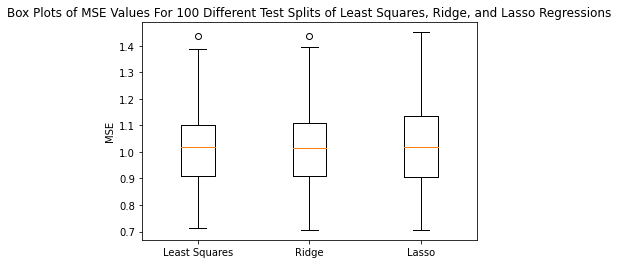

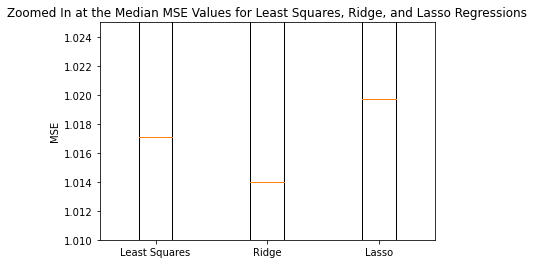

In [11]:
import matplotlib.pyplot as plt

plt.boxplot(x=[mse_ls, mse_ridge, mse_lasso], labels=["Least Squares", "Ridge", "Lasso"])
plt.title("Box Plots of MSE Values For 100 Different Test Splits of Least Squares, Ridge, and Lasso Regressions")
plt.ylabel("MSE")
plt.show()

plt.boxplot(x=[mse_ls, mse_ridge, mse_lasso], labels=["Least Squares", "Ridge", "Lasso"])
plt.title("Zoomed In at the Median MSE Values for Least Squares, Ridge, and Lasso Regressions")
plt.ylim(1.010, 1.025)
plt.ylabel("MSE")
plt.show()

# Regression Task Analysis and Interpretation

## Step 1)

- Now that we know which model to use, let's re-train Ridge Regression to predict temperature and see what the lambda parameter, coefficient estimates, and mean squared error are.

In [12]:
lambdas = 10**np.linspace(4,-2,100)*0.5
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train_norm, y_train)
print("Chosen Lambda Value from RidgeCV:", ridgecv.alpha_)

coefs_ridge = pd.Series(ridgecv.coef_, index=X.columns)
print("\nCoefficient Estimates for the Lambda Value Chosen by RidgeCV:")
print(coefs_ridge)

y_hat_ridge = ridgecv.predict(X_test_norm)
mean_squared_error(y_hat_ridge, y_test)
print("\nMean Squared Error for the Ridge Regression:", mean_squared_error(y_hat_ridge, y_test))

Chosen Lambda Value from RidgeCV: 0.4348745013088917

Coefficient Estimates for the Lambda Value Chosen by RidgeCV:
Time            -0.173533
CO(GT)          -1.028477
PT08.S1(CO)     -0.110015
NMHC(GT)        -0.142196
C6H6(GT)         0.435712
PT08.S2(NMHC)    2.345565
NOx(GT)          0.280062
PT08.S3(NOx)     0.637658
NO2(GT)          0.442339
PT08.S4(NO2)    -0.982771
PT08.S5(O3)     -0.704737
RH              -5.007323
AH               3.602687
dtype: float64

Mean Squared Error for the Ridge Regression: 1.02617949012863


## Step 1 (Continued)

- The plot below shows a helpful visualization of our coefficient estimates at the chosen lambda (red vertical line) and how the coefficient estimates change due to an increasing lambda value.
- Although we started with a Simple Least Squares Regression in Step 1 of the Regression Task Implementation, the slight dip in many of the coefficient values shown in the plot below is a good indicator as to why making the change to Ridge Regression was a logical choice.

In [13]:
from sklearn.linear_model import Ridge

coefs_lambdas = []
for l in lambdas:
    ridge = Ridge(alpha = l, random_state=381)
    ridge.fit(X_train_norm, y_train)
    coefs_lambdas.append(ridge.coef_)

coefs_lambdas = pd.DataFrame(coefs_lambdas, columns=X.columns)

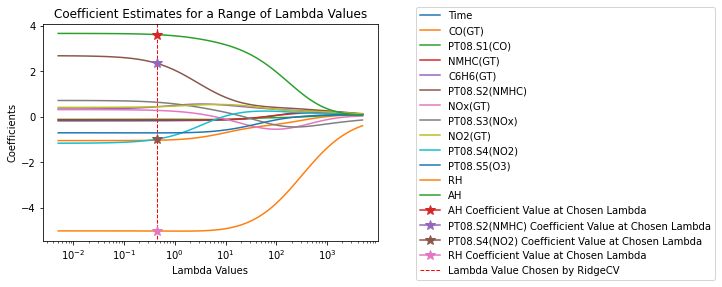

In [14]:
for var in coefs_lambdas.columns:
    plt.plot(lambdas, coefs_lambdas[var], label = var)

plt.xscale('log')
plt.axis('tight')
plt.xlabel('Lambda Values')
plt.ylabel('Coefficients')
plt.title('Coefficient Estimates for a Range of Lambda Values for Ridge Regression')
plt.vlines(x=ridgecv.alpha_, ymin=-10, ymax=10, label='Lambda Value Chosen by RidgeCV', 
           color="r", linestyles='dashed', linewidth=1)

plt.plot(ridgecv.alpha_, coefs_ridge['AH'], marker='*', markersize=10, 
         label='AH Coefficient Value at Chosen Lambda')
plt.plot(ridgecv.alpha_, coefs_ridge['PT08.S2(NMHC)'], marker='*', markersize=10, 
        label='PT08.S2(NMHC) Coefficient Value at Chosen Lambda')
plt.plot(ridgecv.alpha_, coefs_ridge['PT08.S4(NO2)'], marker='*', markersize=10,
        label='PT08.S4(NO2) Coefficient Value at Chosen Lambda')
plt.plot(ridgecv.alpha_, coefs_ridge['RH'], marker='*', markersize=10,
        label='RH Coefficient Value at Chosen Lambda')

plt.legend(bbox_to_anchor = (1.1,1.1))
plt.show()

## Conclusion

- Since the mean squared error for Ridge Regression is relatively low, especially compared to the MSE values for Least Squares and Lasso Regressions, we can state that our model is the most successful out of the three in predicting temperature in the Italian city.
- Furthermore, another reason as to why the Ridge Regression is successful is because after cleaning the data, there are 827 observations remaining, which is a good size to train/test with. And there are 14 predictors, which is a good amount of variables to choose from that most help predict temperature values.